## LONDON DATA CRIME

### ASSIGNMENT 1

### Apa yang terdapat dalam dataset 'London Crime'?

Dataset ini merupakan data kejahatan/kriminal di London (IbuKota Inggris). Data 

1. lsoa_code: Kode Wilayah Kepolisian.
2. borough: Nama wilayah di London.
3. major_category: Kategorisasi kejahatan tingkat tinggi.
4. minor_category: Kategorisasi kejahatan tingkat rendah.
5. nilai: Jumlah kriminal di wilayah tersebut.
6. tahun: Tahun penghitungan yang dilaporkan, 2008–2016.
7. bulan: Bulan dari jumlah yang dilaporkan, 1–12.

### IMPORT LIBRARY

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from turtle import color
from logging import root

### READ DATA

In [2]:
df = pd.read_csv('london_crime_by_lsoa.csv')

In [3]:
#Show Dataframe
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


### SEE DATA DESCRIPTION

In [4]:
# Dataframe has 13,490,604 Rows and 7 Columns
df.shape

(13490604, 7)

In [5]:
# View the data for each variable in full
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [6]:
# View a list of column headers
df.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [7]:
# View a list of row headers
df.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

In [8]:
# Check null value
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

## Data Cleaning
Delete unnecessary variables and data

### 1. Removed unneeded variable (lsoa_code)

In [9]:
kol = (['lsoa_code'])
df.drop(kol, axis=1, inplace=True)

In [10]:
df.head(5)

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6


### 2. Delete data that has a value of 0

In [11]:
df= df[df.value != 0]

In [12]:
df.head(5)

,borough,major_category,minor_category,value,year,month
9,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
24,Ealing,Theft and Handling,Other Theft Person,2,2012,1
25,Hackney,Violence Against the Person,Harassment,1,2013,2
32,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4


### 3. Since the data is random, let's sort it again

In [13]:
df.reset_index(drop=True, inplace=True)

In [14]:
df.head(5)

,borough,major_category,minor_category,value,year,month
0,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
2,Ealing,Theft and Handling,Other Theft Person,2,2012,1
3,Hackney,Violence Against the Person,Harassment,1,2013,2
4,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4


### 4. Now the number of data changes to 3,419,099 rows and 6 columns

In [15]:
df.shape

(3419099, 6)

## Data Visualization 

## A. Area Plot

3 Which region had the highest number of criminals during 2008-2016 ?

In [16]:
# remove unnecessary columns
kol = ["major_category","minor_category","month"]
top3 = df.drop(kol, axis=1)

#column 1 (borough)
top3 = top3.set_index("year").groupby("borough").sum()

#column 2 (value)
top3 = top3.sort_values(by="value", ascending=False).head(3)

top3

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809


In [17]:
# delete column
df_top3 = df.drop(kol, axis=1).set_index("borough")

# add index
df_top3 = df_top3.loc[top3.index]

# Displays 2 data from the variables borough and year

df_top3 = pd.pivot_table(df_top3, values="value", aggfunc=np.sum, index="year", columns="borough")

df_top3

borough,Lambeth,Southwark,Westminster
year,,,
2008,31717,33470,47846
2009,31225,30623,48456
2010,31671,31320,48116
2011,33224,30723,54243
2012,33473,30737,59226
2013,31868,31128,53852
2014,31765,28912,47564
2015,33164,30260,47395
2016,34071,31636,48330


In [18]:
# View the description of the Lambeth column
df_top3['Lambeth'].describe()

count        9.000000
mean     32464.222222
std       1014.515005
min      31225.000000
25%      31717.000000
50%      31868.000000
75%      33224.000000
max      34071.000000
Name: Lambeth, dtype: float64

In [19]:
# View the description of the Southwark column
df_top3['Southwark'].describe()

count        9.000000
mean     30978.777778
std       1215.293049
min      28912.000000
25%      30623.000000
50%      30737.000000
75%      31320.000000
max      33470.000000
Name: Southwark, dtype: float64

In [20]:
# View the description of the Westminster column
df_top3['Westminster'].describe()

count        9.000000
mean     50558.666667
std       4201.683918
min      47395.000000
25%      47846.000000
50%      48330.000000
75%      53852.000000
max      59226.000000
Name: Westminster, dtype: float64

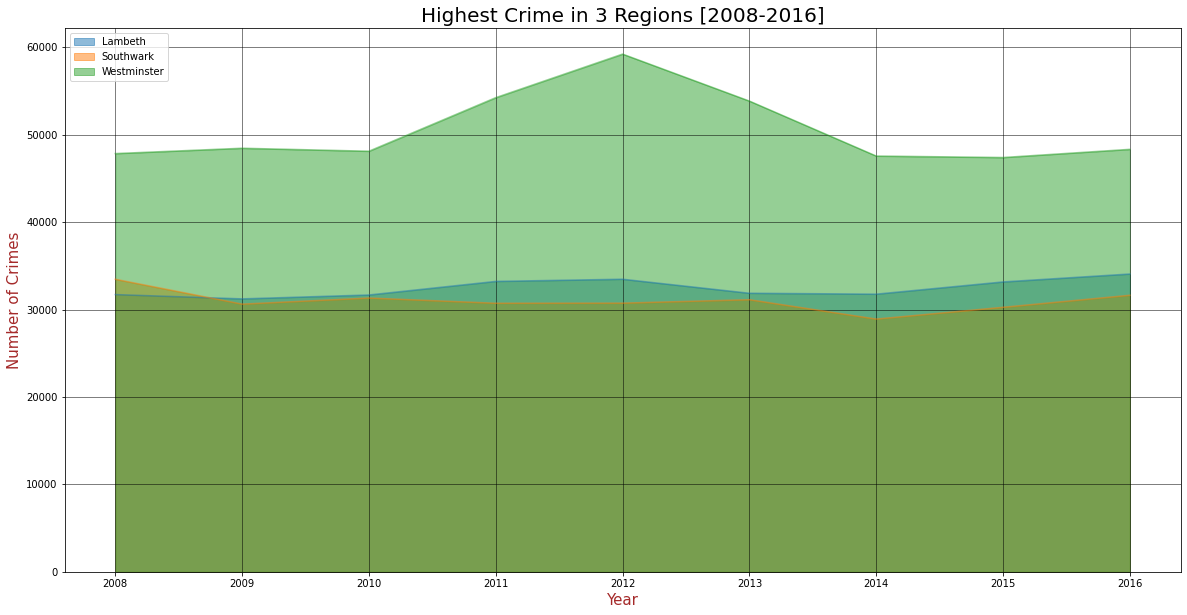

In [22]:
df_top3.plot(kind='area', figsize=(20,10), stacked=False, alpha=0.5)
plt.title('Highest Crime in 3 Regions [2008-2016]', fontsize=20)
plt.xlabel('Year', fontsize=15, color='brown')
plt.ylabel('Number of Crimes', fontsize=15, color='brown')
plt.grid(color='black', linewidth=0.5)
plt.legend(loc='upper left')
plt.show()

### CONCLUSION

-> 3 wilayah yang memiliki tindak kriminal tinggi?
Westminer, Southwark, dan Lambeth.

-> Di tiap wilayah, tahun berapakah yang tingkat kriminalnya tertinggi?
Tingkat Kriminal Tertinggi di Wilayah Lambeth adalah 34071 data di tahun 2016
Tingkat Kriminal Tertinggi di Wilayah Southwark adalah 33470 data di tahun 2008
Tingkat Kriminal Tertinggi di Wilayah Westminer adalah 59226 data di tahun 2012

-> Di tiap wilayah, tahun berapakah yang tingkat kriminalnya terendah?
Tingkat Kriminal Terendah di Wilayah Lambeth adalah 31225 data di tahun 2009
Tingkat Kriminal Terendah di Wilayah Southwark adalah 28912 data di tahun 2014
Tingkat Kriminal Terendah di Wilayah Westminer adalah 47395 data di tahun 2015

-> Wilayah manakah yang Tingkat Kriminalnya Tertinggi?
Wilayah Westminer memiliki tindak kriminal yang lebih tinggi dari ke-2 wilayah yang lain.

-> Wilayah manakah yang Tingkat Kriminalnya Terendah?
Wilayah Westminer memiliki tindak kriminal yang lebih tinggi dari dari kedua wilayah yang lain. 


## B. Histogram
What is the frequency distribution of the number of crimes in the London area in 2008-2016?

In [24]:
# remove unnecessary columns
column1 = ["major_category","minor_category","month","year"]

df_histogram= df.drop(column1, axis=1)
df_histogram = df_histogram.groupby("borough").sum()

df_histogram

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349
Camden,275147
City of London,780
Croydon,260294
Ealing,251562


In [25]:
# make axis into multiple bin
count, bin_edges = np.histogram(df_histogram)

In [26]:
print(count)

[ 1  1  5  4 13  5  3  0  0  1]


In [27]:
print(bin_edges)

[   780.   46204.8  91629.6 137054.4 182479.2 227904.  273328.8 318753.6
 364178.4 409603.2 455028. ]


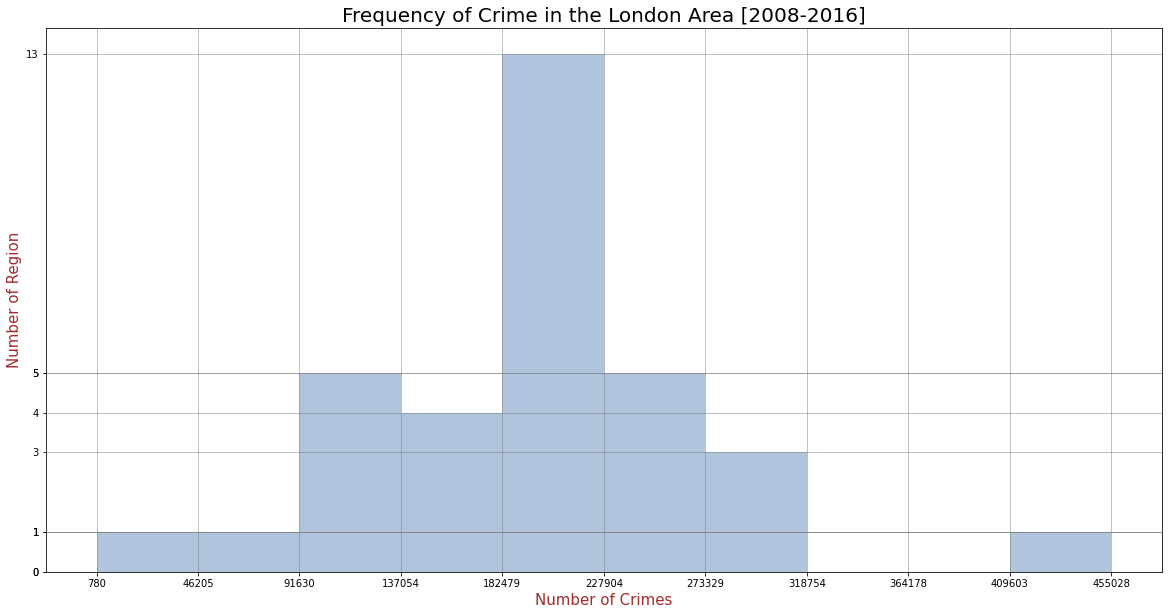

In [29]:
df_histogram.plot(kind="hist",figsize=(20,10), xticks=bin_edges, yticks=count,legend = False,color="lightsteelblue")

plt.title("Frequency of Crime in the London Area [2008-2016]", fontsize=20)

plt.xlabel("Number of Crimes", fontsize=15, color = "brown")

plt.ylabel("Number of Region", fontsize=15, color = "brown")

plt.grid(color="gray", linewidth=0.5)

plt.show()

### CONCLUSION

1 wilayah memiliki frekuensi jumlah tindak kriminal antara 780 - 46.205
1 wilayah memiliki frekuensi jumlah tindak kriminal antara 46.205 - 91.630
5 wilayah memiliki frekuensi jumlah tindak kriminal antara 91.630 - 137.054
4 wilayah memiliki frekuensi jumlah tindak kriminal antara 137.054 - 182.479
13 wilayah memiliki frekuensi jumlah tindak kriminal antara 182.479 - 227.904
5 wilayah memiliki frekuensi jumlah tindak kriminal antara 227.904 - 273.329
3 wilayah memiliki frekuensi jumlah tindak kriminal antara 273.329 - 318.754
1 wilayah memiliki frekuensi jumlah tindak kriminal antara 409.603 - 455.028

## C. Bar Chart
What areas had the 'HIGHEST' and 'LOWEST' crime rates during 2008 - 2016 ?

In [30]:
# Displays the overall YEAR, BOROUGH and VALUE columns per year
# Sorted by year (year) and alphabetically (borough)
df_barchart1 = df[['year', 'borough', 'value']].groupby(['year','borough']).agg({'value': 'sum'})

df_barchart1.head()

value
year borough                    
2008 Barking and Dagenham  17656
     Barnet                23944
     Bexley                15305
     Brent                 23504
     Bromley               24015

In [31]:
# Displays the overall BOROUGH and VALUE columns per year
# Sorted alphabetically(borough)
df_barchart2 = df_barchart1.reset_index()[['borough', 'value']].groupby(['borough']).agg({'value': 'sum'})

df_barchart2.head()

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349


In [32]:
df_barchart2

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349
Camden,275147
City of London,780
Croydon,260294
Ealing,251562


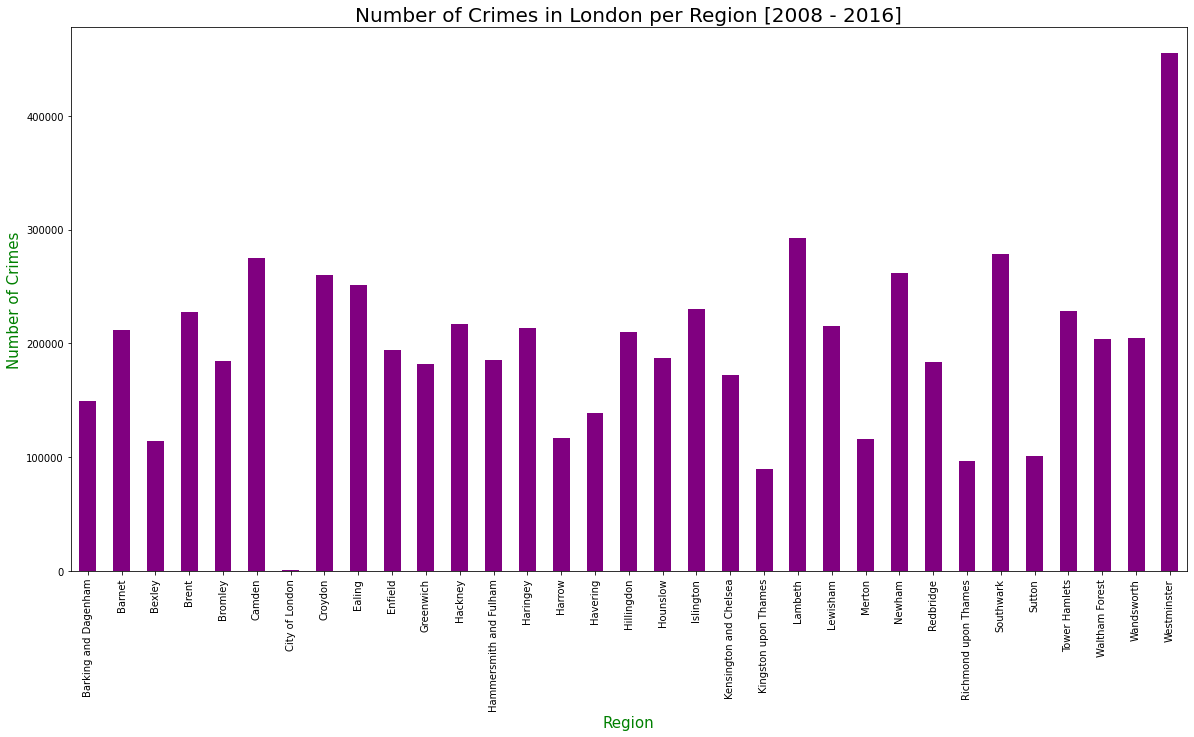

In [35]:
df_barchart2.plot(kind = 'bar', figsize=(20,10), color='purple',legend = False)

plt.title('Number of Crimes in London per Region [2008 - 2016]', fontsize = 20)

plt.xlabel('Region', fontsize = 15, color = "green")

plt.ylabel('Number of Crimes', fontsize = 15, color = "green")

plt.show()

### CONCLUSION

#1
Wilayah yang memiliki tindak kriminal tertinggi yaitu wilayah 'Westminster' dengan nilai 455.028

#2
Wilayah yang memiliki tindak kriminal ke-2 tertinggi yaitu 'Lambeth' dengan nilai 292.178

#3
Wilayah yang memiliki tindak kriminal terendah yaitu 'City of London' dengan nilai 780
    
#4
Wilayah yang memiliki tindak kriminal ke-2 terendah yaitu 'Kingston upon Thames' dengan nilai 89.306

## D. Pie Chart
What areas were the 10 regions with the highest crime rates during 2008 - 2016?

In [36]:
df_pie = df_barchart2.sort_values('value', ascending=False).head(10)
df_pie
print('Top 10 borough:\n', df_pie)


Top 10 borough:
                 value
borough              
Westminster    455028
Lambeth        292178
Southwark      278809
Camden         275147
Newham         262024
Croydon        260294
Ealing         251562
Islington      230286
Tower Hamlets  228613
Brent          227551


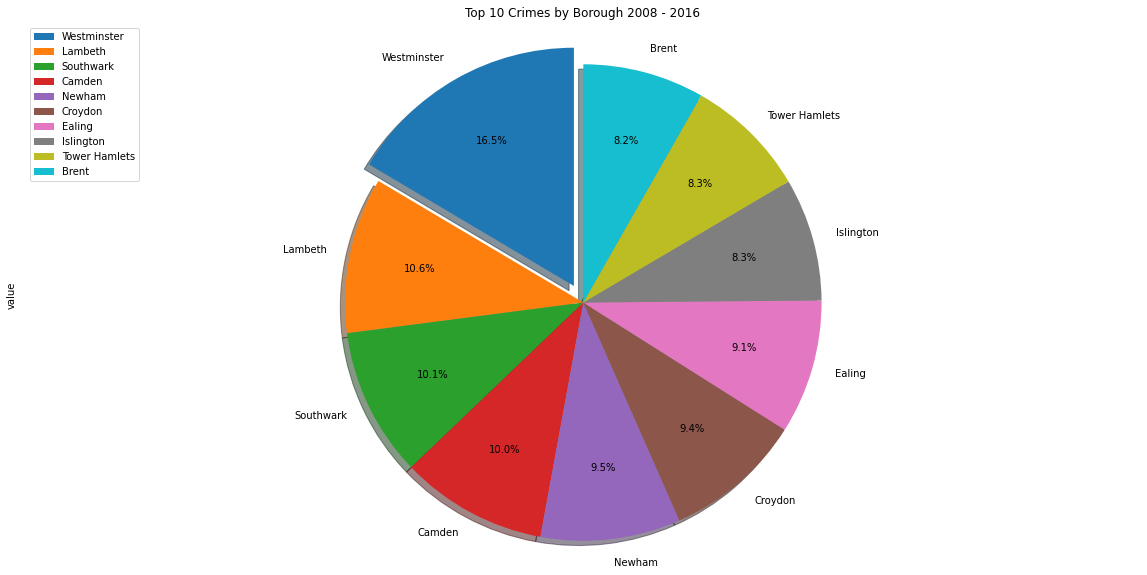

In [37]:
explode_list = [.08, 0, 0, 0, 0, 0, 0, 0, 0, 0]

df_pie.plot(kind="pie",figsize=(20,10),autopct='%1.1f%%',startangle=90,shadow=True,
    label=None,pctdistance=0.7,rot = 45,subplots = True,explode=explode_list)

plt.title('Top 10 Crimes by Borough 2008 - 2016')

plt.axis('equal')

plt.legend(labels=df_pie.index, loc='upper left')

plt.show()

### CONCLUSION

10 wilayah tersebut merupakan wilayah dengan tindak kriminal terbanyak sepanjang tahun 2008 - 2016. Dengan persentase sebagai berikut:

(1).Westminster = 16,5%
(2).Lambeth = 10,6%
(3).Southwark = 10,1%
(4).Camden = 10,0%
(5).Newham = 9,5%
(6).Croydon = 9,4%
(7).Ealing = 9,1%
(8).Islington = 8,3%
(9).Tower Hamlets = 8,3%
(10).Brent = 8,2%


## E. Box Plot
What is the statistical distribution of the data on the number of crimes in London in 2008-2016?

In [38]:
# create column variables to be deleted (borough, major, minor, and month)
column2 = ["borough","major_category","minor_category","month"]

# remove column2 variable containing borough, major, minor, and month
df_boxplot = df.drop(column2, axis=1)

In [39]:
df_boxplot

,value,year
0,1,2016
1,1,2009
2,2,2012
3,1,2013
4,1,2016
...,...,...
3419094,3,2009
3419095,1,2015
3419096,1,2012
3419097,2,2013


In [40]:
# Sort the year and its value
df_boxplot = df_boxplot.groupby("year").sum()

df_boxplot

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


In [41]:
df_boxplot.describe()

,value
count,9.000000
mean,716417.555556
std,21301.370555
min,680183.000000
25%,711624.000000
50%,717214.000000
75%,736121.000000
max,738641.000000


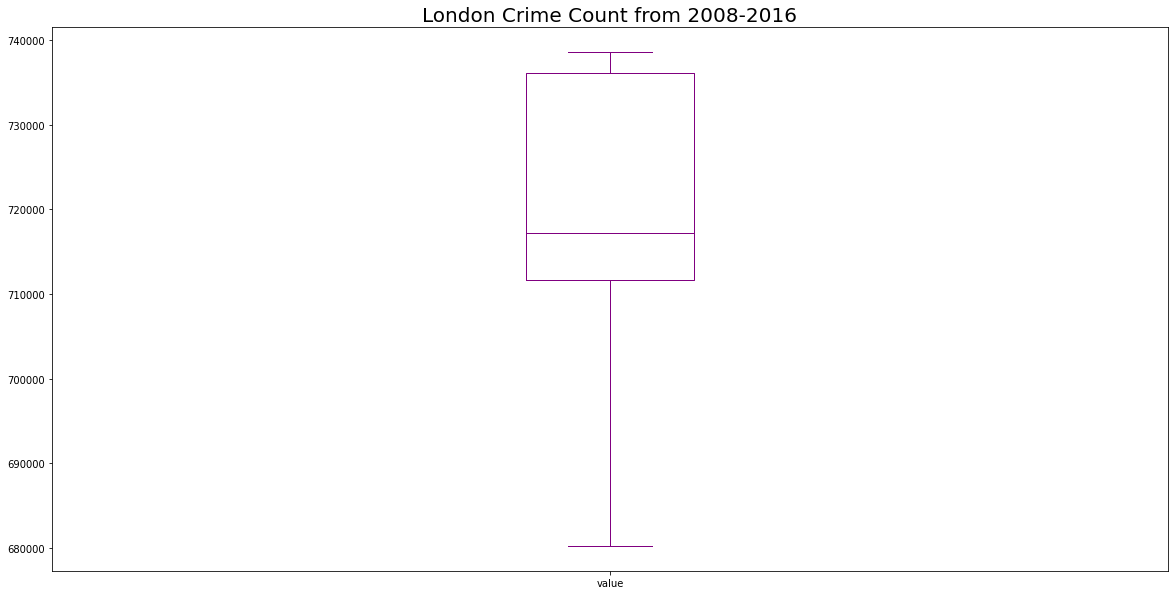

In [42]:
df_boxplot.plot(kind="box", figsize=(20,10),color = "purple")

plt.title("London Crime Count from 2008-2016", fontsize=20)

plt.show()

### CONCLUSION
Menurut visualisasi menggunakan Box Plot, dapat disimpulkan 'Jumlah Tindak Kriminal London dari tahun 2008-2016' memiliki:

Nilai Tindak Kriminal Minimum yaitu berjumlah 680.183
Nilai Tindak Kriminal di Kuartil Satu berjumlah (25%) 711.624
Nilai Tindak Kriminal di Kuartil Dua berjumlah (50%) 717.214
Nilai Tindak Kriminal di Kuartil Tiga (75%) berjumlah 736.121
Nilai Tindak Kriminal Maximum yaitu berjumlah 738.641

## F. Scatter Plot
In 2015, in what month did the crime rate in London reach its highest?

In [43]:
# remove unnecessary columns
column3 = ["borough","major_category","minor_category"]
df_scatter = df.drop(column3, axis=1).set_index("year")

In [44]:
df_scatter = df_scatter.loc[2015]

In [45]:
# Delete the year . column
df_scatter = df_scatter.reset_index().drop("year", axis=1)

In [46]:
# Sort data by month
df_scatter = df_scatter.groupby("month").sum()

In [47]:
df_scatter = df_scatter.reset_index()

df_scatter

,month,value
0,1,57055
1,2,53316
2,3,60096
3,4,56445
4,5,61038
5,6,60760
6,7,61606
7,8,58056
8,9,57564
9,10,62361


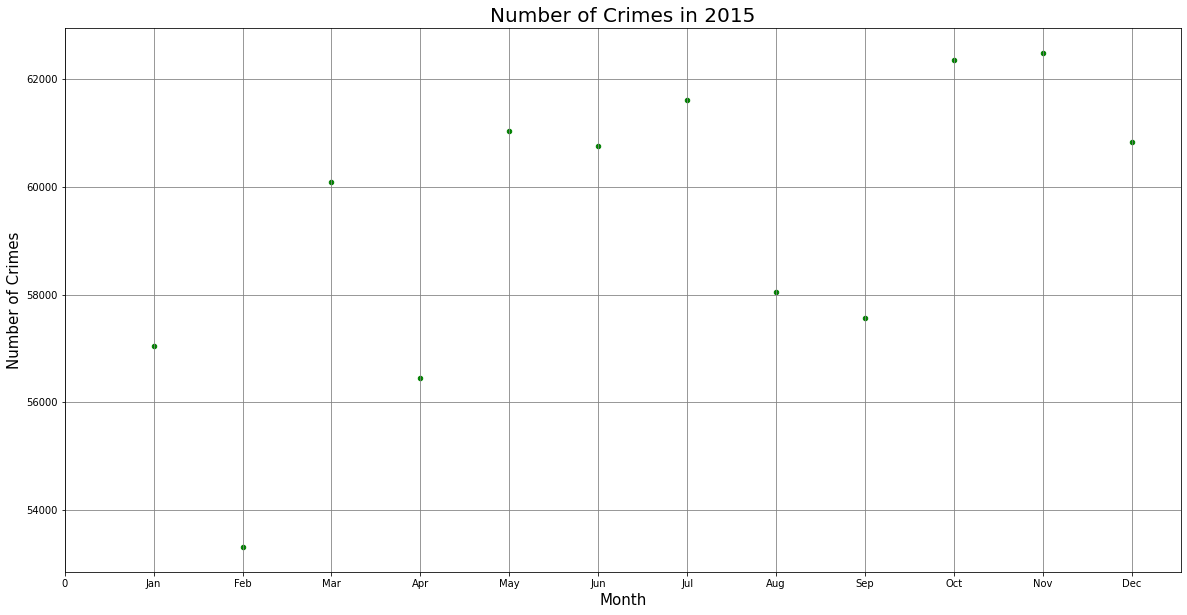

In [48]:
months = np.arange(len(df_scatter["month"])+1)
name_of_months=[0,'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

df_scatter.plot(kind="scatter", x="month",y="value",figsize=(20,10), color="green")

plt.title("Number of Crimes in 2015", fontsize=20)

plt.xlabel("Month", fontsize=15)

plt.ylabel("Number of Crimes", fontsize=15)

plt.xticks(months, name_of_months)

plt.grid(color="grey")

plt.show()

### Conclusion
Dari hasil diatas, dapat disimpulkan sebagai berikut: Jumlah Tindak Kriminal Setiap Bulan di tahun 2015

Tindak kriminal tertinggi berada di bulan November, dengan 62.487 kasus.
Tindak kriminal tertinggi ke-2 berada di bulan October, dengan 62.361 kasus.

Tindak kriminal terendah berada di bulan Februari dengan 53.316 kasus
Tindak kriminal terendah ke-2 berada di bulan April dengan 56.445 kasus.

## G. Word Clouds
What region have the most frequent crimes (major_category) during 2008-2016?

In [49]:
# Displays borough, major, minor, year, value kolom columns
df_word = pd.DataFrame(df, columns = ['borough', 'major_category','year','value'])

df_word.head()

,borough,major_category,year,value
0,Sutton,Theft and Handling,2016,1
1,Barking and Dagenham,Theft and Handling,2009,1
2,Ealing,Theft and Handling,2012,2
3,Hackney,Violence Against the Person,2013,1
4,Bromley,Criminal Damage,2016,1


In [50]:
# Display the borough and value columns
#sorted by borough and values ​​per region have been added up
df_word1 =df_word[['borough', 'value']].groupby(['borough'], as_index= True).sum()

df_word1.head()

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349


In [51]:
total =df_word1['value'].sum()
total

6447758

In [52]:
max_words = 100
word_string = ''

for borough in df_word1.index.values:
    # checks if the country name is a one word name
    if len(borough.split(' ')) == 1:
        repeat_num_times = int(df_word1.loc[borough, 'value']/float(total)*max_words)
        word_string = word_string + ((borough + ' ') * repeat_num_times)
                                     

wordcloud = WordCloud(background_color='white').generate(word_string)

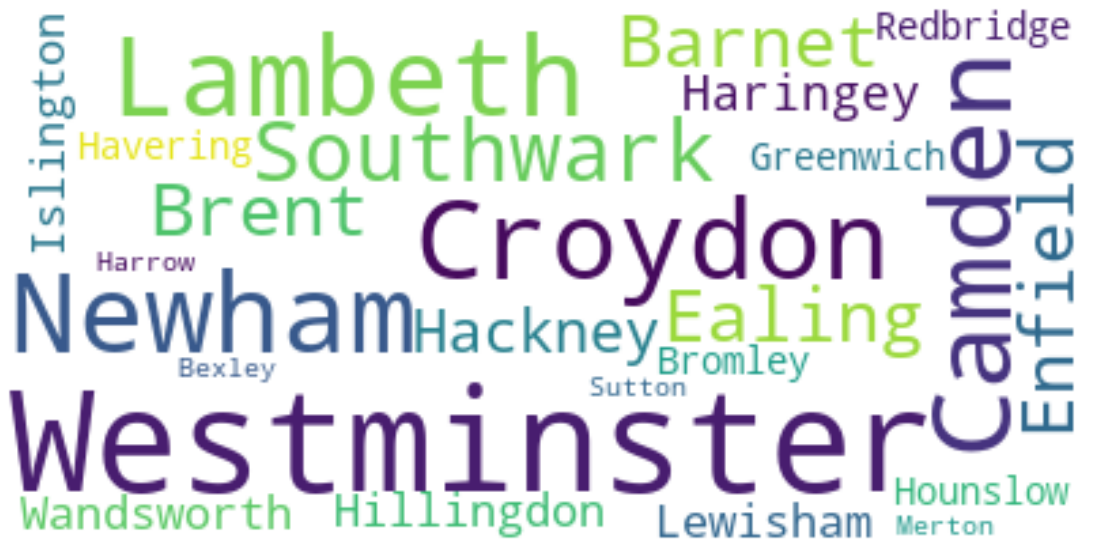

In [53]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(10)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### CONCLUSION:

Wilayah Westminster menjadi tempat tindak kriminal yang paling banyak pertama.
Wilayah Lambeth menjadi tempat tindak kriminal yang paling banyak kedua.
Wilayah Southwark menjadi tempat tindak kriminal yang paling banyak ketiga.

## I. Overall Analysis

Terdapat 3 wilayah yang memiliki tindak kriminal tinggi yaitu : Westminster, Southwark, dan Lambeth

Wilayah Westminer dengan perolehan persentase sebanyak 16,5%, sehingga menjadi wilayah yang memiliki tindak kriminal terbanyak sepanjang tahun 2008 - 2016. Kasusnya ada 455.028 kasus

Wilayah City of London menjadi wilayah yang memiliki tindak kriminal terendah sepanjang tahun 2008 - 2006, dengan 780 kasus.

Sebanyak 13 wilayah memiliki frekuensi jumlah tindak kriminal antara 182.479 - 227.904.

Tahun 2015 di bulan November merupakan jumlah tindak kriminal tertinggi sebanyak 62.487 kasus.

Tahun 2015 di bulan Februari merupakan jumlah tindak kriminal terendah sebanyak 53.316 kasus.